In [1]:
#!pip install seaborn
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pickle

In [2]:
data=pd.read_csv('cars_price.csv')

In [3]:
data.head()

,Unnamed: 0,make,model,priceUSD,year,condition,mileage(kilometers),fuel_type,volume(cm3),color,transmission,drive_unit,segment
0,0,honda,accord,565,1993,with mileage,960015.0,petrol,2000.0,black,mechanics,front-wheel drive,D
1,1,ford,fusion,5550,2008,with mileage,172000.0,diesel,1400.0,silver,mechanics,front-wheel drive,M
2,2,nissan,teana,8300,2008,with mileage,223000.0,petrol,2500.0,purple,auto,front-wheel drive,D
3,3,volkswagen,fox,3300,2005,with mileage,140000.0,petrol,1200.0,blue,mechanics,front-wheel drive,A
4,4,nissan,primera,2450,2002,with damage,413000.0,diesel,2200.0,burgundy,mechanics,front-wheel drive,D


In [4]:
#check statistical info
data.describe()

,Unnamed: 0,priceUSD,year,mileage(kilometers),volume(cm3)
count,40000.00000,40000.000000,40000.000000,4.000000e+04,39970.000000
mean,19999.50000,7430.383775,2003.485625,2.434332e+05,2103.201676
std,11547.14972,8338.242134,8.114896,3.167033e+05,938.724653
min,0.00000,95.000000,1938.000000,0.000000e+00,500.000000
25%,9999.75000,2350.000000,1998.000000,1.370000e+05,1600.000000
50%,19999.50000,5350.000000,2004.000000,2.280000e+05,1995.000000
75%,29999.25000,9850.000000,2010.000000,3.087610e+05,2300.000000
max,39999.00000,195000.000000,2019.000000,9.999999e+06,20000.000000


# clean data 

In [5]:
# check null values in data det
data.isna().sum().values

array([   0,    0,    0,    0,    0,    0,    0,    0,   30,    0,    0,
       1345, 3755], dtype=int64)

In [6]:
# very few values are null. rather than replace these values with 0 or mean method we can drop it 
data.dropna(axis=0,inplace=True)

In [23]:
# drop unneccessary column from data frame and make copy it.
data1=data.drop(labels=['Unnamed: 0'],axis=1)

In [24]:
#checek duplicat values
data1.duplicated().sum()


45

In [25]:
# drop these 
data1.drop_duplicates(inplace=True)
data1

,make,model,priceUSD,year,condition,mileage(kilometers),fuel_type,volume(cm3),color,transmission,drive_unit,segment
0,honda,accord,565,1993,with mileage,960015.0,petrol,2000.0,black,mechanics,front-wheel drive,D
1,ford,fusion,5550,2008,with mileage,172000.0,diesel,1400.0,silver,mechanics,front-wheel drive,M
2,nissan,teana,8300,2008,with mileage,223000.0,petrol,2500.0,purple,auto,front-wheel drive,D
3,volkswagen,fox,3300,2005,with mileage,140000.0,petrol,1200.0,blue,mechanics,front-wheel drive,A
4,nissan,primera,2450,2002,with damage,413000.0,diesel,2200.0,burgundy,mechanics,front-wheel drive,D
...,...,...,...,...,...,...,...,...,...,...,...,...
39994,audi,a4,9700,2008,with mileage,278000.0,diesel,2000.0,blue,mechanics,front-wheel drive,D
39995,jeep,grand-cherokee,12500,2008,with mileage,214000.0,petrol,3700.0,silver,auto,all-wheel drive,J
39996,peugeot,607,4754,2001,with mileage,295000.0,petrol,2200.0,blue,mechanics,front-wheel drive,E
39997,mercedes-benz,c-klass,4000,1999,with mileage,0.0,diesel,2200.0,other,mechanics,rear drive,D


In [9]:
#plot graph between dependent and independent variables 

<Figure size 842.4x626.4 with 0 Axes>

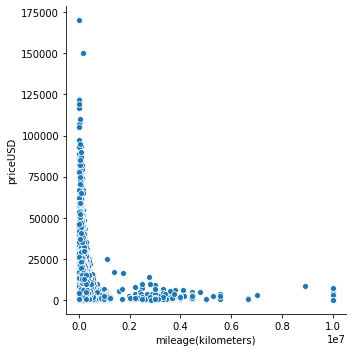

In [10]:
#Graph price vs mileage 
plt.figure(figsize=(11.7,8.7))
sns.relplot(x='mileage(kilometers)',y='priceUSD',sizes=(15,200),data=data1)

Text(0.5, 0, 'Make')

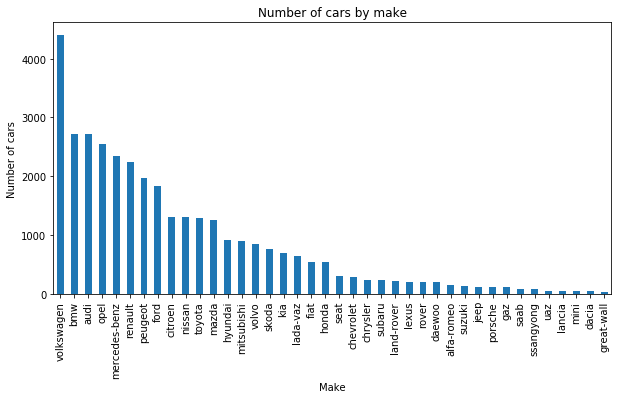

In [12]:
# Plotting a Histogram
data1.make.value_counts().nlargest(40).plot(kind='bar', figsize=(10,5))
plt.title('Number of cars by make')
plt.ylabel('Number of cars')
plt.xlabel('Make')

In [13]:
#highest number of cars are volkswegan

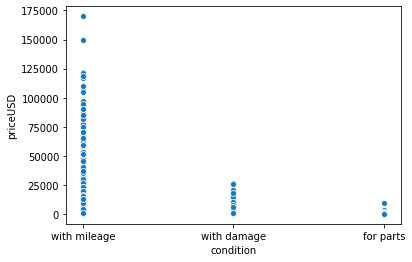

In [14]:
#2 price vs condition
sns.scatterplot(data1['condition'],data1['priceUSD'])

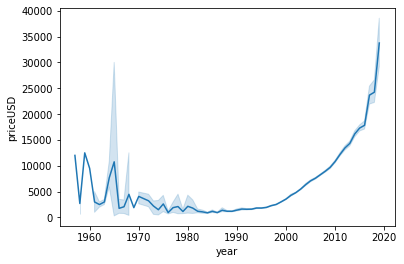

In [15]:
#year vs priceUSD
sns.lineplot(data1['year'],data1['priceUSD'])

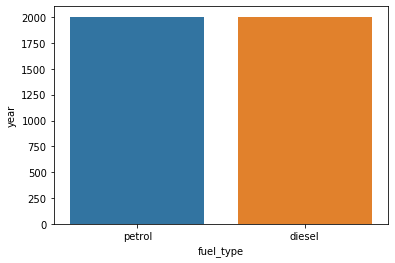

In [16]:
sns.barplot(data1['fuel_type'],data1['year'])

In [17]:
# plot data
def groupby(x1,x2):
    fig, ax = plt.subplots(figsize=(15,7))
# use unstack()
    data1.groupby([x1,x2]).count()['priceUSD'].unstack().plot(ax=ax)

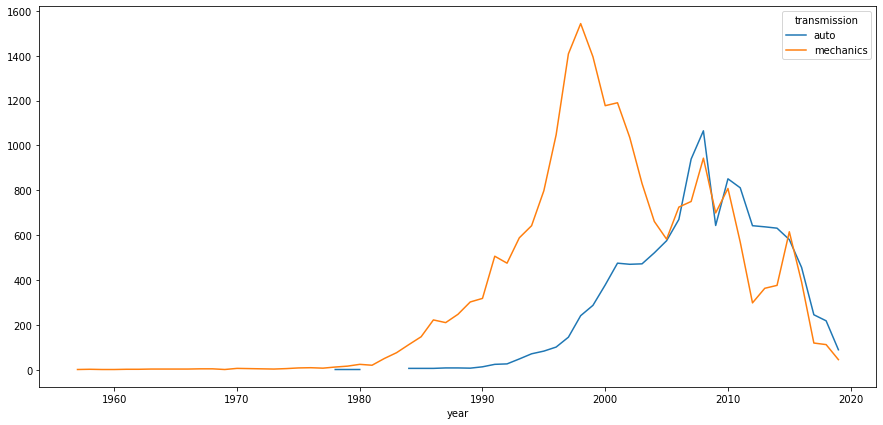

In [18]:
groupby('year','transmission')

In [19]:
#here we can see mechanic cars are rapidly grow in between 1990 to 2000 and after 2000 to 2010 its fall down but its more than auto.
#where auto cars are grow (less than mechanics)in middle of 1990 to 2010.But 2010 to 2020 its decrease. After 2010 to 2020 auto cars are more than mechanics.

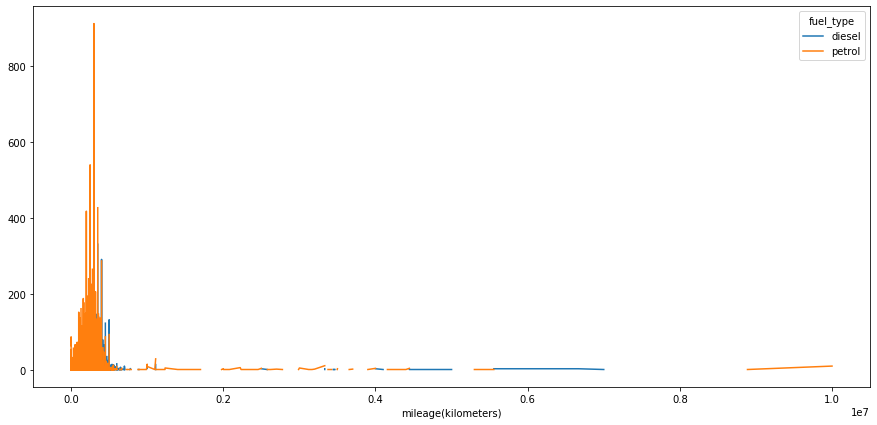

In [20]:
groupby('mileage(kilometers)','fuel_type')

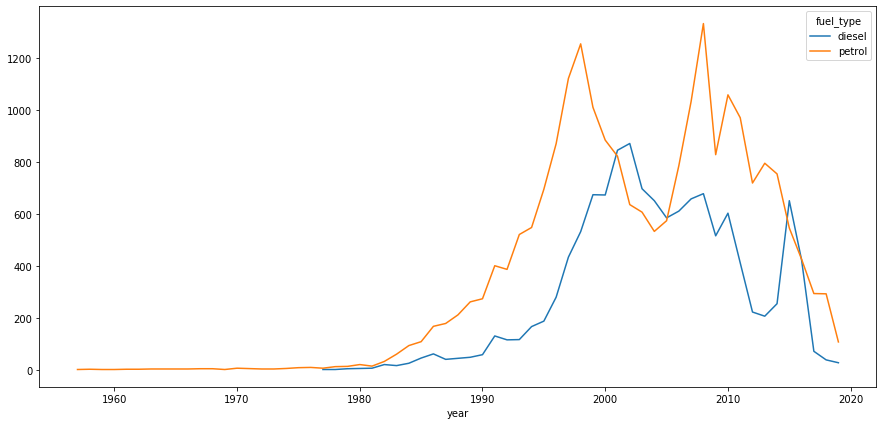

In [21]:
groupby('year','fuel_type')

In [22]:
#convert categorical data into numeric 

In [26]:
data1['fuel_type'].replace(to_replace=['petrol','diesel'],value=[0,1],inplace=True)

from sklearn.preprocessing import LabelEncoder

lb_make = LabelEncoder()
data1["make"] = lb_make.fit_transform(data1["make"])


In [27]:
data['condition'].value_counts()

with mileage    34493
with damage       264
for parts         259
Name: condition, dtype: int64

In [28]:
#You can see here "with mileage" car has more than other. We can use if else situation where with mileage 
#has 1 and other car has 0 value
data1["condition_code"] = np.where(data1["condition"].str.contains("with mileage"),1,0)


In [29]:
data1['drive_unit'].value_counts()

front-wheel drive             24680
rear drive                     4355
all-wheel drive                3817
part-time four-wheel drive     2119
Name: drive_unit, dtype: int64

In [30]:
data1['transmission'].value_counts()

mechanics    22518
auto         12453
Name: transmission, dtype: int64

In [31]:
data1['transmission'].replace(to_replace=['mechanics','auto'],value=[0,1],inplace=True)

In [32]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34971 entries, 0 to 39999
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   make                 34971 non-null  object 
 1   model                34971 non-null  object 
 2   priceUSD             34971 non-null  int64  
 3   year                 34971 non-null  int64  
 4   condition            34971 non-null  object 
 5   mileage(kilometers)  34971 non-null  float64
 6   fuel_type            34971 non-null  int64  
 7   volume(cm3)          34971 non-null  float64
 8   color                34971 non-null  object 
 9   transmission         34971 non-null  int64  
 10  drive_unit           34971 non-null  object 
 11  segment              34971 non-null  object 
 12  condition_code       34971 non-null  int32  
dtypes: float64(2), int32(1), int64(4), object(6)
memory usage: 3.6+ MB


In [33]:
df=data1.drop(labels=['model','condition','color','drive_unit','segment'],axis=1)
df

,make,priceUSD,year,mileage(kilometers),fuel_type,volume(cm3),transmission,condition_code
0,honda,565,1993,960015.0,0,2000.0,0,1
1,ford,5550,2008,172000.0,1,1400.0,0,1
2,nissan,8300,2008,223000.0,0,2500.0,1,1
3,volkswagen,3300,2005,140000.0,0,1200.0,0,1
4,nissan,2450,2002,413000.0,1,2200.0,0,0
...,...,...,...,...,...,...,...,...
39994,audi,9700,2008,278000.0,1,2000.0,0,1
39995,jeep,12500,2008,214000.0,0,3700.0,1,1
39996,peugeot,4754,2001,295000.0,0,2200.0,0,1
39997,mercedes-benz,4000,1999,0.0,1,2200.0,0,1


In [34]:
A=df.copy()
A.drop(labels=['priceUSD'],axis=1,inplace=True)

In [35]:
B=df.iloc[:,1]


In [36]:
A=pd.get_dummies(A,drop_first=True)

In [77]:
from sklearn.ensemble import ExtraTreesRegressor


In [78]:
extra_tree = ExtraTreesClassifier(n_estimators = 5, 
                                        criterion ='entropy', max_features =5) 
  
# Training the model 
extra_tree_forest.fit(A,B) 
  
# Computing the importance of each feature 
feature_importance = extra_tree_forest.feature_importances_ 
  
# Normalizing the individual importances 
feature_importance_normalized = np.std([tree.feature_importances_ for tree in 
                                        extra_tree_forest.estimators_], 
                                        axis = 0) 

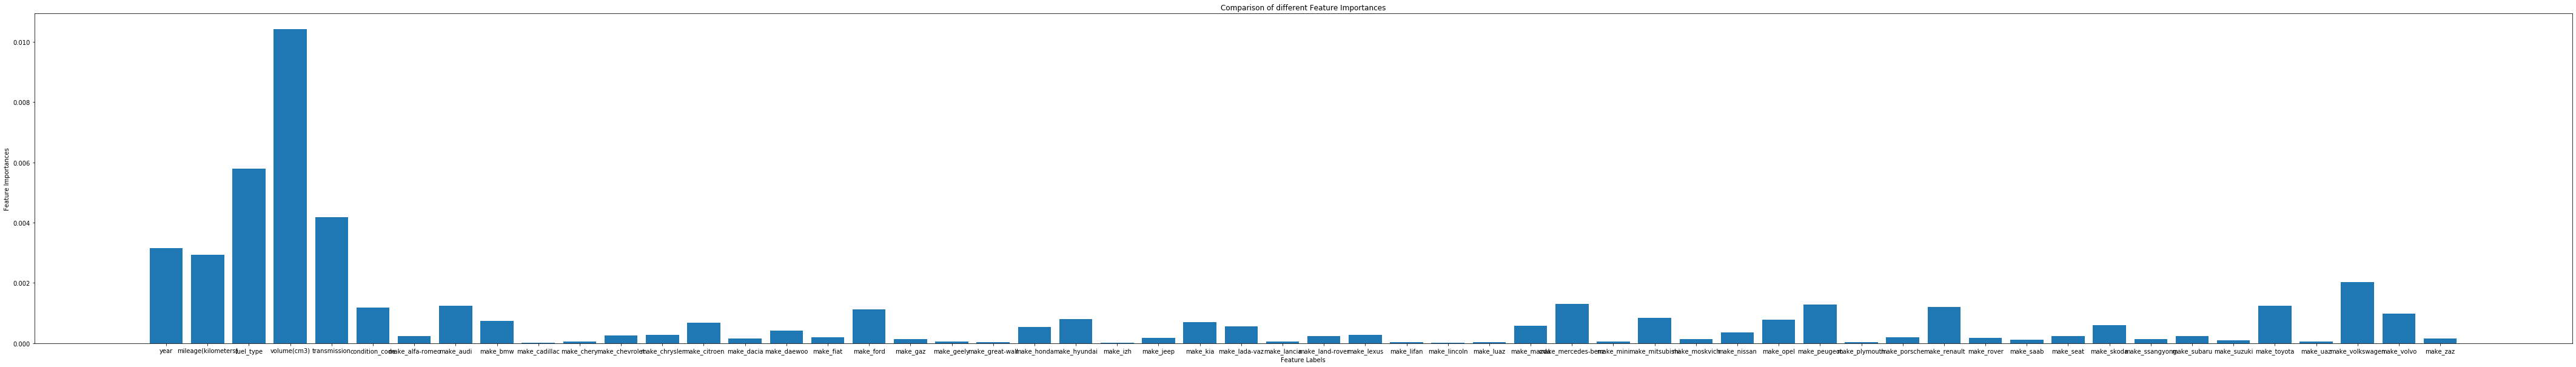

In [79]:
plt.figure(figsize=(75,10))
plt.bar(A.columns, feature_importance_normalized) 
plt.xlabel('Feature Labels') 
plt.ylabel('Feature Importances') 
plt.title('Comparison of different Feature Importances') 
plt.show() 

In [52]:
X=A.iloc[:,0:5]
B

0          565
1         5550
2         8300
3         3300
4         2450
         ...  
39994     9700
39995    12500
39996     4754
39997     4000
39999      744
Name: priceUSD, Length: 34971, dtype: int64

In [70]:
X

,year,mileage(kilometers),fuel_type,volume(cm3),transmission
0,1993,960015.0,0,2000.0,0
1,2008,172000.0,1,1400.0,0
2,2008,223000.0,0,2500.0,1
3,2005,140000.0,0,1200.0,0
4,2002,413000.0,1,2200.0,0
...,...,...,...,...,...
39994,2008,278000.0,1,2000.0,0
39995,2008,214000.0,0,3700.0,1
39996,2001,295000.0,0,2200.0,0
39997,1999,0.0,1,2200.0,0


In [44]:
from sklearn.model_selection import train_test_split

In [53]:
x_train,x_test,y_train,y_test=train_test_split(X,B)
print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)

(26228, 5) (26228,) (8743, 5) (8743,)


In [54]:
from xgboost import XGBRegressor
model=XGBRegressor()

In [55]:
#create function 
def models(model):
    model.fit(x_train,y_train)
    score=model.score(x_test,y_test)
    return score

In [82]:
models(model)

0.8787115132946567

In [58]:
prediction=model.predict(x_test)

In [59]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 1513.6199424562146
MSE: 7106464.378167827
RMSE: 2665.7952618623635


Text(0, 0.5, 'Predictions')

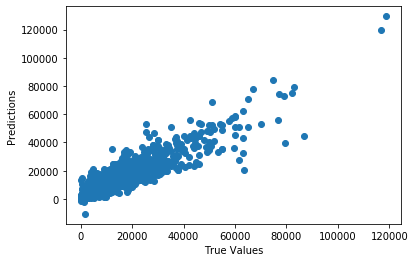

In [60]:
## The line / model
plt.scatter(y_test, prediction)
plt.xlabel("True Values")
plt.ylabel("Predictions")

In [ ]:
#check model is overfitted or underfitted

In [61]:
from sklearn.model_selection import KFold,cross_val_score,cross_val_predict # import KFold


In [63]:
kf = KFold(n_splits=10) # Define the split - into 2 folds 
kf.get_n_splits(X) # returns the number of splitting iterations in the cross-validator
print(kf) 
KFold(n_splits=2, random_state=None, shuffle=False)

KFold(n_splits=10, random_state=None, shuffle=False)


KFold(n_splits=2, random_state=None, shuffle=False)

In [65]:
scores = cross_val_score(model, X, B, cv=6)
print ("Cross-validated scores:", scores)

Cross-validated scores: [0.8576998  0.85093208 0.83596379 0.84102668 0.80311571 0.83399579]


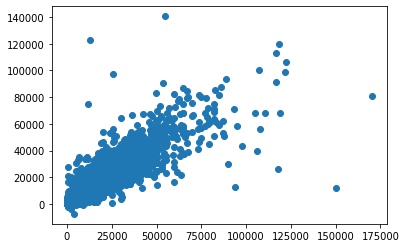

In [67]:
# Make cross validated predictions
predictions = cross_val_predict(model, X,B, cv=6)
pre=pd.DataFrame(predictions)
plt.scatter(B, pre)

In [68]:
#load model 

In [69]:
pickle.dump(model, open('models.pkl', 'wb'))

In [47]:
#try with another algorithms and check result

In [57]:
from sklearn.linear_model import Lasso,ridge_regression,ridge,LogisticRegression

C:\Users\sj\anaconda\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.linear_model.ridge module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.linear_model. Anything that cannot be imported from sklearn.linear_model is now part of the private API.
  warnings.warn(message, FutureWarning)


In [60]:
lasso=Lasso()
models(lasso)

0.5059755198493133

In [52]:
#lr=LogisticRegression()
#models(lr)

In [81]:
models(extra_tree)

0.018300354569369782